In [1]:
import pickle

In [2]:
# Function to load and inspect a pickle file
def load_and_inspect_pickle(file_path):
    try:
        # Open the pickle file in binary read mode
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
        
        # Print the type and content of the loaded data
        print("Type of the loaded data:", type(data))
        print("Contents of the loaded data:", data)
        
        return data
    except Exception as e:
        print("An error occurred:", e)


In [3]:
# Replace 'your_pickle_file.pkl' with the path to your pickle file
file_path = '/global/homes/j/joeschm/data/ST_research/NSTXU_discharges/ELM_data/dalpha_db.pkl'
data = load_and_inspect_pickle(file_path)




Type of the loaded data: <class 'list'>
Contents of the loaded data: [{'shot': 138614.0, 'data lower dalpha': array([1.5000e-02, 1.5000e-02, 1.0000e-02, ..., 1.0235e+01, 1.0235e+01,
       1.0235e+01], dtype=float32), 'time lower dalpha': array([-0.00999999, -0.00979999, -0.00959999, ...,  6.3381996 ,
        6.3384    ,  6.3386    ], dtype=float32), 'data upper dalpha': array([-5.0000e-03, -5.0000e-03, -5.0000e-03, ..., -1.0235e+01,
       -1.0235e+01, -1.0235e+01], dtype=float32), 'time upper dalpha': array([-0.00999999, -0.00979999, -0.00959999, ...,  6.3381996 ,
        6.3384    ,  6.3386    ], dtype=float32)}, {'shot': 138617.0, 'data lower dalpha': array([1.0000e-02, 1.5000e-02, 1.5000e-02, ..., 1.0235e+01, 1.0235e+01,
       1.0235e+01], dtype=float32), 'time lower dalpha': array([-0.00999999, -0.00979999, -0.00959999, ...,  6.3381996 ,
        6.3384    ,  6.3386    ], dtype=float32), 'data upper dalpha': array([-5.0000e-03, -1.0000e-02, -5.0000e-03, ..., -1.0235e+01,
       -

In [4]:
data[7].keys()

for ind_data in data:

    for key, value in ind_data.items():
        # print(key, value.shape)
        if key == 'shot':
            print(value)

138614.0
138617.0
138620.0
138748.0
138855.0
139054.0
139057.0
139058.0
139291.0
139292.0
139877.0
139878.0
139881.0
139885.0
139890.0
139891.0
139892.0
139893.0
139895.0
139896.0
139897.0
139901.0
139903.0
139906.0
139907.0
139908.0
139913.0
139914.0
139950.0
139953.0
139954.0
139956.0
139957.0
139958.0
139962.0
139965.0
139969.0
139971.0
140526.0
140616.0
140617.0
140619.0
140620.0
141283.0
141300.0
141301.0
141303.0
141304.0
141305.0
141306.0
141307.0
141309.0
141310.0
141311.0
141313.0
141314.0
141318.0
141319.0
141320.0
141321.0
141322.0
141326.0
141448.0
141450.0
141456.0
141461.0
141464.0
141745.0
141747.0
141919.0
141920.0
141922.0
142000.0
142001.0
142006.0
142231.0
142232.0
129015.0
129038.0
132588.0
132543.0


In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


# Organize the data and plot
def plot_data(data):
    # Assuming each item in 'data' is a dictionary containing the shot ID and arrays
    for item in data:
        shot_id = item['shot']

        if int(shot_id) in [129015, 129038]:
            # Data and time for lower dalpha
            data_lower = item['data lower dalpha']
            time_lower = item['time lower dalpha']
            # Filter for time < 3
            mask_lower = time_lower < 3
            data_lower_filtered = data_lower[mask_lower]
            time_lower_filtered = time_lower[mask_lower]

            # Data and time for upper dalpha
            data_upper = item['data upper dalpha']
            time_upper = item['time upper dalpha']
            # Filter for time < 3
            mask_upper = time_upper < 3
            data_upper_filtered = data_upper[mask_upper]
            time_upper_filtered = time_upper[mask_upper]

            print(len(time_upper_filtered))
            print(len(time_lower_filtered))

            # Create plots
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
            fig.suptitle(f'Shot ID: {shot_id}')

            ax1.plot(time_lower_filtered, data_lower_filtered, label='Lower dalpha')
            ax1.set_title('Lower dalpha')
            ax1.set_xlabel('Time')
            ax1.set_ylabel('Data')
            ax1.legend()

            ax2.plot(time_upper_filtered, data_upper_filtered, label='Upper dalpha')
            ax2.set_title('Upper dalpha')
            ax2.set_xlabel('Time')
            ax2.set_ylabel('Data')
            ax2.legend()

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()


15049
15049


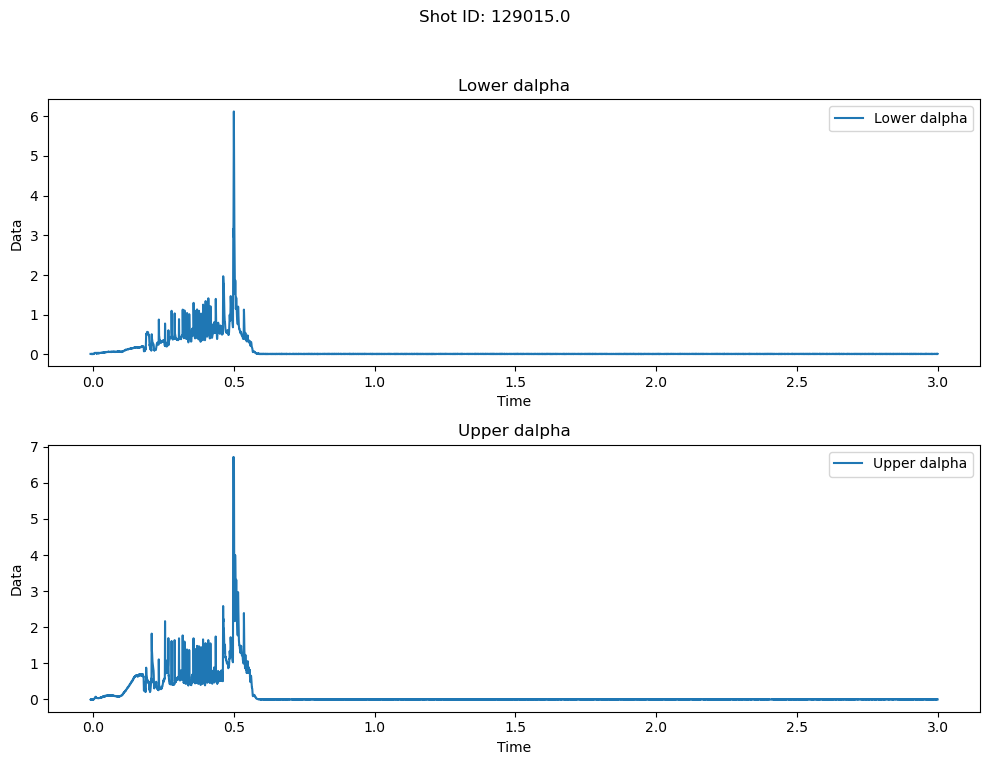

15049
15049


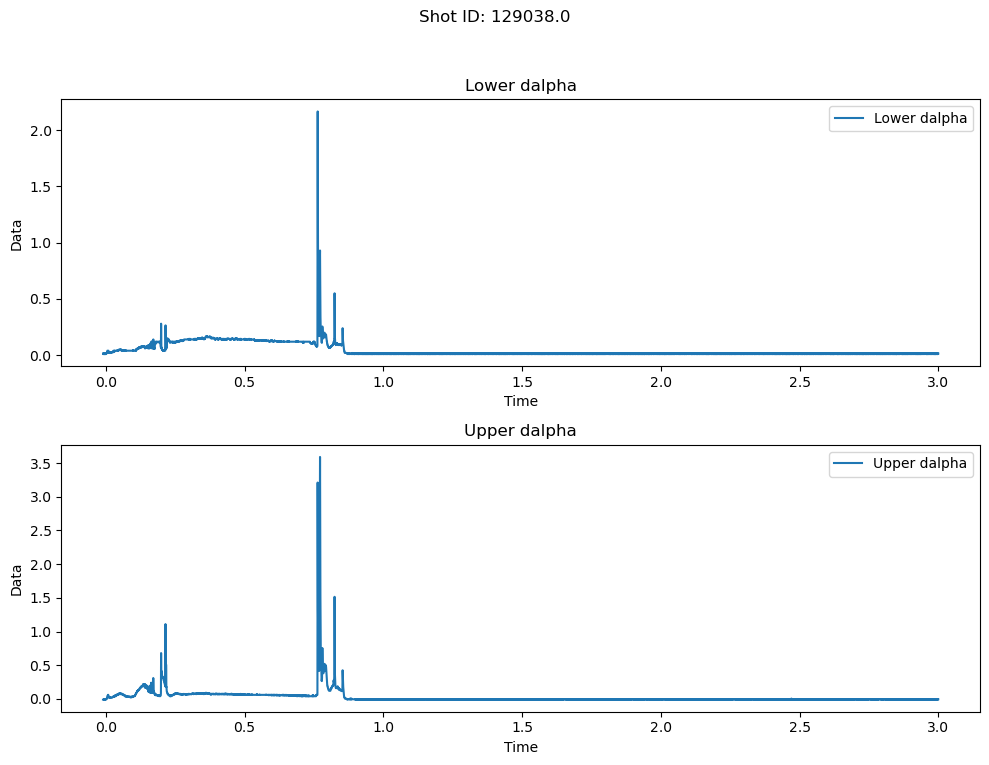

In [6]:

# Plot the data
plot_data(data)


In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Organize the data and plot
def plot_all_data(data, time_threshold=1.5, datasets_per_plot=10):
    dataset_count = 0  # Counter for datasets processed
    figure_count = 1   # Counter for figures
    
    # Initialize a figure
    plt.figure(figsize=(10, 6))
    plt.title(f'Figure {figure_count}: Overlapping Datasets')
    plt.xlabel('Time')
    plt.ylabel('Data')
    
    for item in data:
        shot_id = item['shot']

        # Data and time for lower dalpha
        data_lower = item['data lower dalpha']
        time_lower = item['time lower dalpha']
        # Filter for time < time_threshold
        mask_lower = time_lower < time_threshold
        data_lower_filtered = data_lower[mask_lower]
        time_lower_filtered = time_lower[mask_lower]

        # Data and time for upper dalpha
        data_upper = item['data upper dalpha']
        time_upper = item['time upper dalpha']
        # Filter for time < time_threshold
        mask_upper = time_upper < time_threshold
        data_upper_filtered = data_upper[mask_upper]
        time_upper_filtered = time_upper[mask_upper]

        # Plot data
        plt.plot(time_lower_filtered, data_lower_filtered, label=f'{shot_id} - Lower dalpha')
        plt.plot(time_upper_filtered, data_upper_filtered, label=f'{shot_id} - Upper dalpha')
        
        dataset_count += 1

        # If we've reached the maximum datasets for this figure, show and reset
        if dataset_count == datasets_per_plot:
            plt.legend()
            plt.tight_layout()
            plt.show()
            
            # Start a new figure
            dataset_count = 0
            figure_count += 1
            plt.figure(figsize=(10, 6))
            plt.title(f'Figure {figure_count}: Overlapping Datasets')
            plt.xlabel('Time')
            plt.ylabel('Data')

    # Show any remaining datasets in the last figure
    if dataset_count > 0:
        plt.legend()
        plt.tight_layout()
        plt.show()


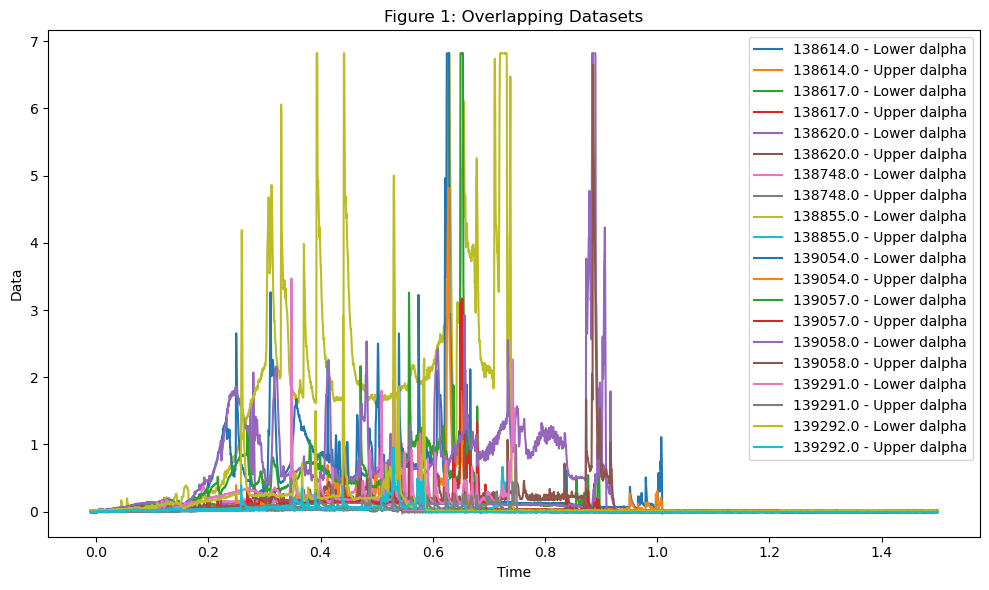

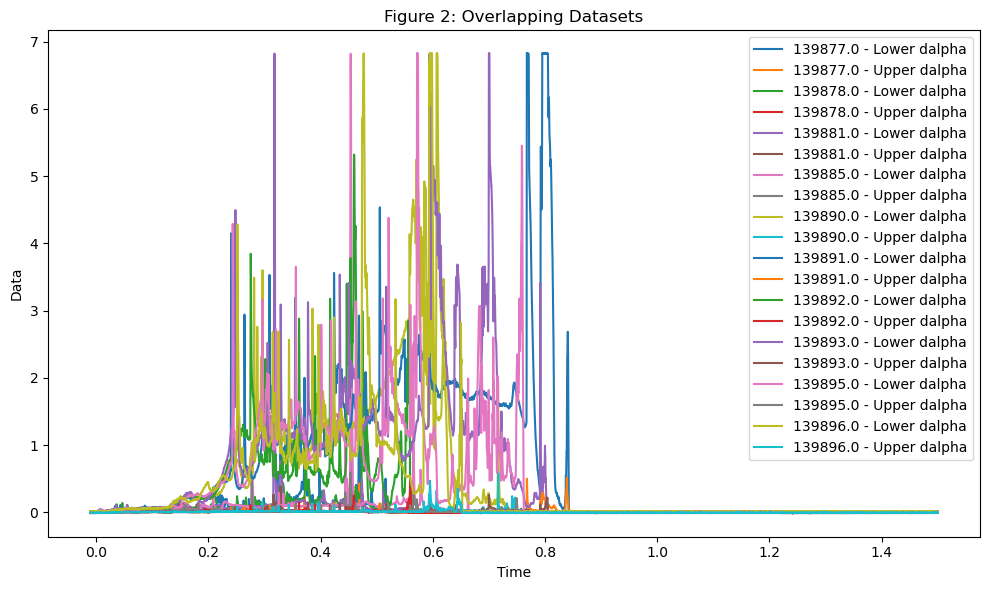

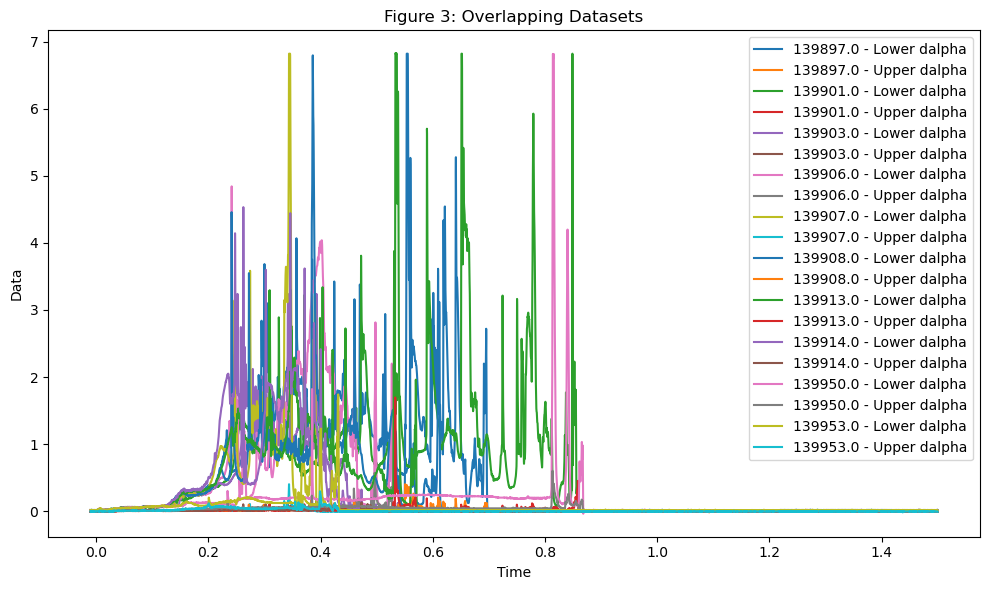

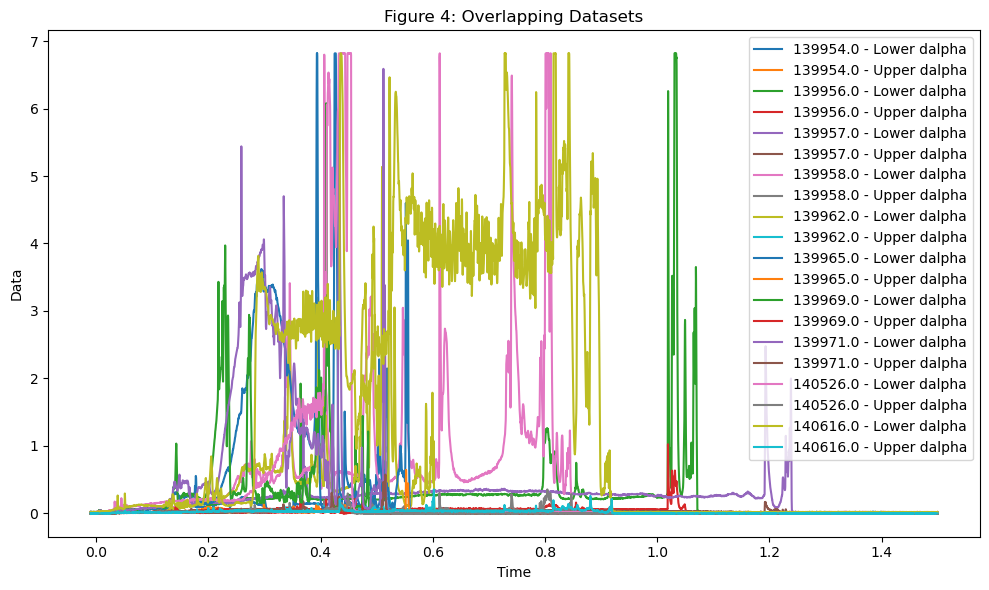

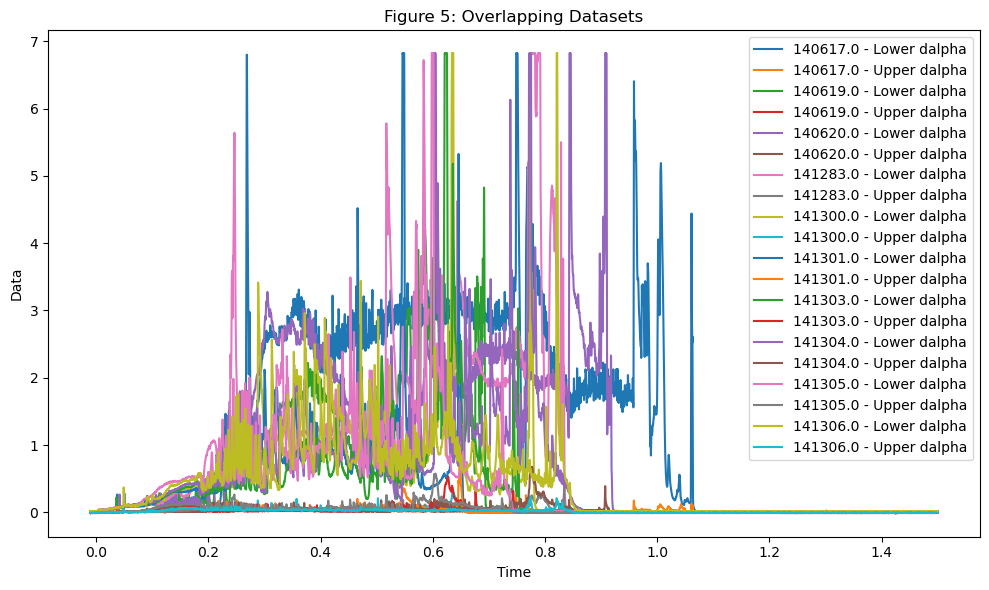

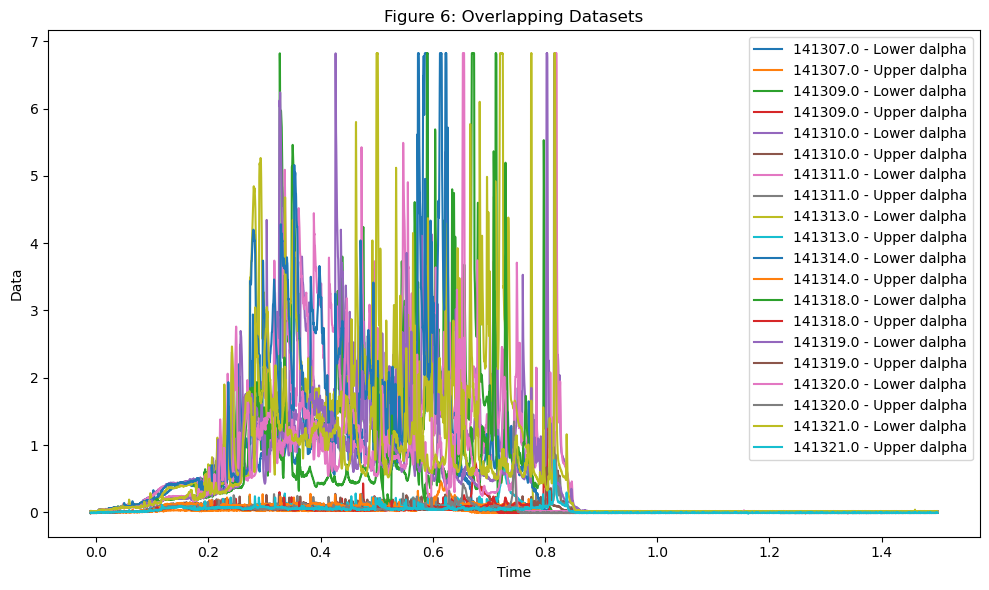

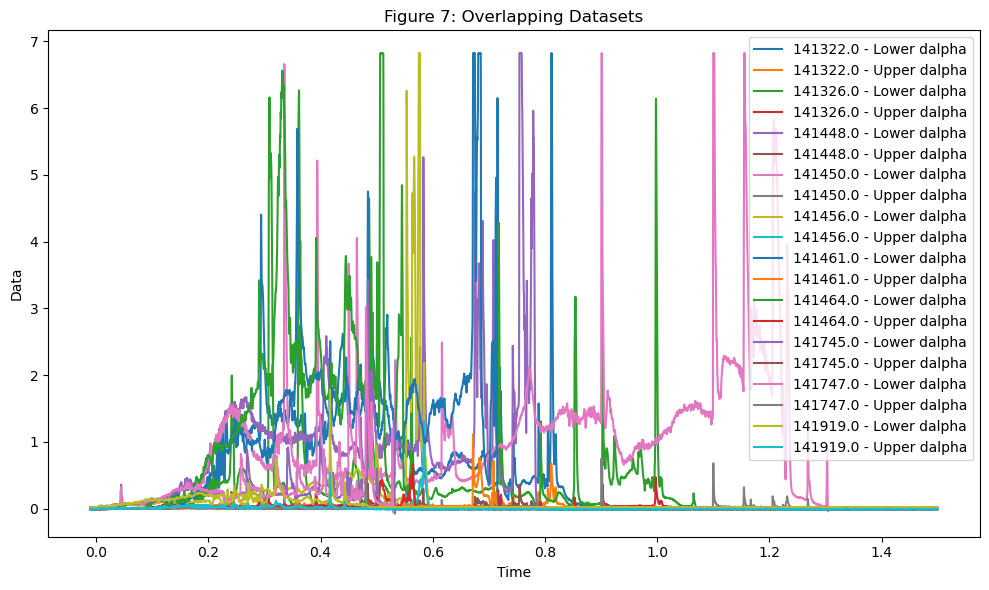

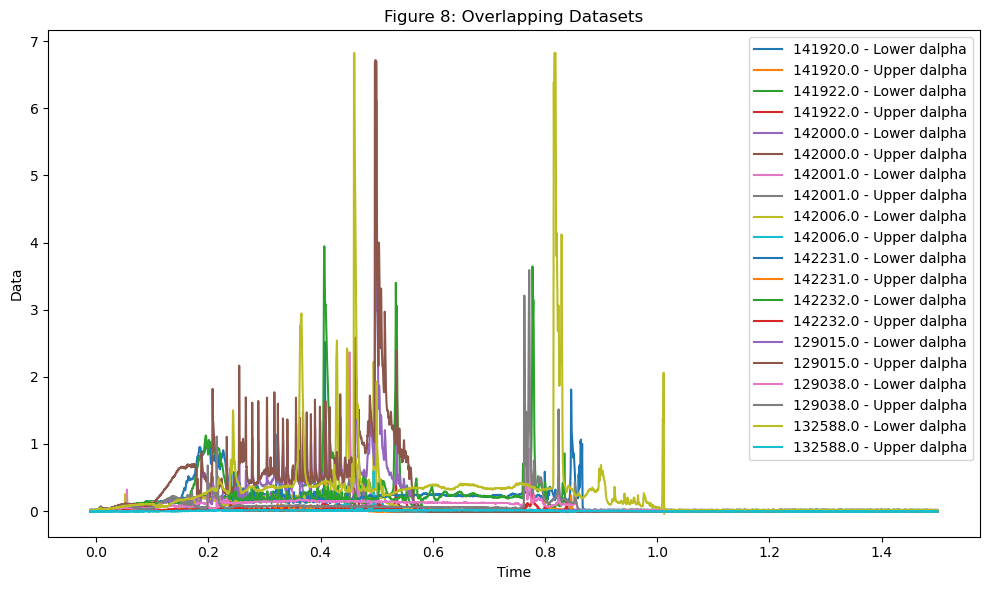

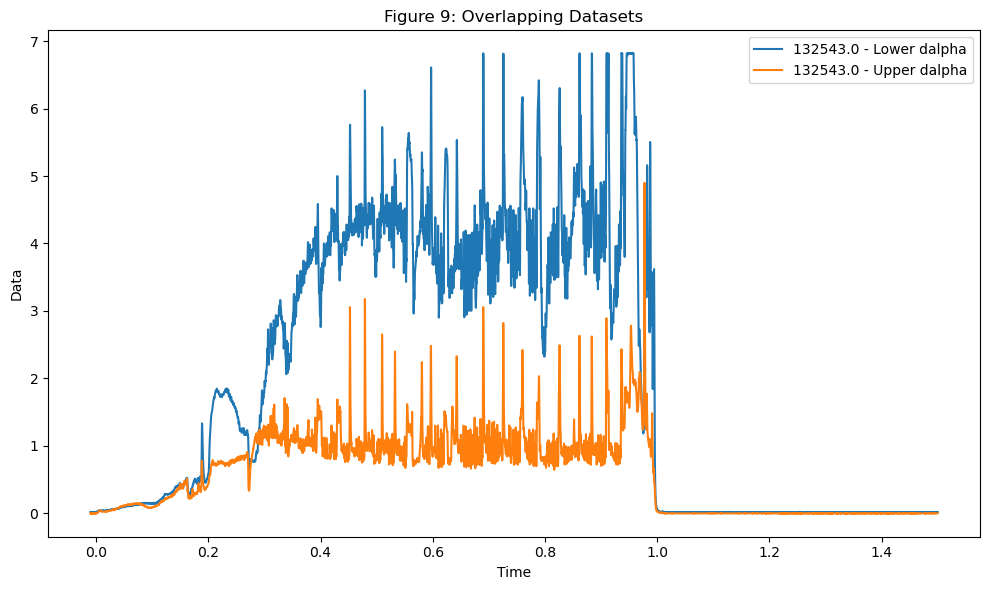

In [14]:
plot_all_data(data)